# KNN Simulations

In [1]:
from orb_builder import *
import soap_utilities as su
import report_parser as rp
from ml_knn import *

from datetime import datetime
from sklearn.model_selection import train_test_split


#### Get Satellite and Platform Data

In [2]:
starlink = build_satellites_csv("starlink")
moon_sats = get_moon_platforms()
mars_sats = get_mars_platforms()
ground = [
    create_ground_object_dictionary("Ground-Albany", 42.685012663456163, -73.82479012295363, 0),
    create_ground_object_dictionary("Ground-Sydney", -33.868888888888889, 151.20939697339508, 0)
]
norad = build_satellites_from_tle("./sources/tdrss.tle")


#### Generate ORB Files

In [3]:
folder_base = f"./outputs/knn-simulations"
make_folder(folder_base)

date = datetime.now()
print(f"Running simulations on date = {date}")

sample_size = 50
simulation_count = 50

folder_name = f"starlink-{sample_size}-moon-{simulation_count}-mars-{simulation_count}"
make_folder(f"{folder_base}/{folder_name}")

orb_filenames = [] # used to keep track of what files to feed into soap

def generate_orb_files(folder_name, name, satellites, date):
    save_to_outputs_file(
            generate_orb(satellites, name, date),
            f"knn-simulations/{folder_name}/{name}", "orb")
    return name + ".orb"

# Generate Earth-Only Simulations
# for i in range(simulation_count):
#     name = f"starlink_{date.strftime('%Y-%m')}_{i}"
#     orb_filename = generate_orb_files(
#         folder_name, 
#         name, 
#         sample_sats(starlink, sample_size),
#         date)
#     orb_filenames.append(orb_filename)

# Generate Earth / Moon Simulations
for i in range(simulation_count):
    name = f"starlink_moon_{date.strftime('%Y-%m')}_{i}"
    orb_filename = generate_orb_files(
        folder_name, 
        name, 
        sample_sats(starlink, sample_size) + moon_sats,
        date)
    orb_filenames.append(orb_filename)

# Generate Earth / Mars Simulations
for i in range(simulation_count):
    name = f"starlink_mars_{date.strftime('%Y-%m')}_{i}"
    orb_filename = generate_orb_files(
        folder_name, 
        name, 
        sample_sats(starlink, sample_size) + mars_sats,
        date)
    orb_filenames.append(orb_filename)

# TODO : clean up the following; DONE, remove
# for i in range(simulation_count):
    # name = f"starlink_moon_{date.strftime('%Y-%m')}_{i}"
    # subset = sample_sats(starlink, sample_size)
    # satellites = subset + moon_sats # + ground
    # orb_filenames.append(name + ".orb")
    # save_to_outputs_file(
    #         generate_orb(satellites, name, date),
    #         f"knn-simulations/{folder_name}/{name}", "orb")

    # name = f"starlink_mars_{date.strftime('%Y-%m')}_{i}"
    # subset = sample_sats(starlink, sample_size)
    # satellites = subset + mars_sats # + ground
    # orb_filenames.append(name + ".orb")
    # save_to_outputs_file(
    #         generate_orb(satellites, name, date),
    #         f"knn-simulations/{folder_name}/{name}", "orb")


Running simulations on date = 2023-03-30 18:05:15.084692


#### Execute SOAP

In [4]:
orb_paths = [f"{folder_base}/{folder_name}/{orb}" for orb in orb_filenames]

su.run_soap_mac(orb_paths, max_workers=10)

INFO:soap_utilities:Running `run_soap_mac` with 100 simulations on 10 threads.
INFO:soap_utilities:Running `execute_commands` with 100 commands and 2 hacks.
31:84: execution error: System Events got an error: Can’t set application process "SOAP" to false. (-10006)
57:66: execution error: System Events got an error: Can’t set process "SOAP" to true. (-10006)
31:84: execution error: System Events got an error: Can’t set application process "SOAP" to false. (-10006)
57:66: execution error: System Events got an error: Can’t set process "SOAP" to true. (-10006)
31:84: execution error: System Events got an error: Can’t set application process "SOAP" to false. (-10006)
57:66: execution error: System Events got an error: Can’t set process "SOAP" to true. (-10006)
31:84: execution error: System Events got an error: Can’t set application process "SOAP" to false. (-10006)
57:66: execution error: System Events got an error: Can’t set process "SOAP" to true. (-10006)
31:84: execution error: System 

#### Parse Contact Reports -> Persistence Diagrams

In [13]:
x, y = [], []
EARTH, MOON, MARS = 0, 1, 2

diagrams = {}

for path in orb_paths:
    filepath = path.replace(".orb", " Contact Analysis.csv")

    contact_plan = rp.contact_analysis_parser(filepath)
    graph = rp.construct_graph(contact_plan)    
    weighted_simplex = rp.construct_weighted_simplex(graph)

    zz, dgms, cells = calculate_zz_persistence(weighted_simplex)

    filename = filepath.split("/")[-1]

    diagrams[filename] = {
        "dgms" : dgms,
        "id" : len(x)
    }
    # print(len(dgms))
    # for dgm in dgms:
    #     print(len(dgm))

    x.append(filename)
    label = -1
    if "moon" in filename:
        label = MOON
    elif "mars" in filename:
        label = MARS
    else:
        label = EARTH

    y.append(label)

INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_moon_2023-03_0 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_moon_2023-03_1 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_moon_2023-03_2 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on

54
4105
51
4414
54
5159
54
4454
54
4855
53
4788
53
4237
53
4773


INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_moon_2023-03_9 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_moon_2023-03_10 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_moon_2023-03_11 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v

54
4604
54
4991
55
5033
54
4713
54
4922
55
4816
55
4283


INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_moon_2023-03_15 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_moon_2023-03_16 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_moon_2023-03_17 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser`

53
4733
51
4718
54
4399
54
4465
53
4704
54
4410
54
5012
53
4429


INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_moon_2023-03_23 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_moon_2023-03_24 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_moon_2023-03_25 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser`

54
4550
54
4594
54
5215
54
4559
54
4961
53
4149
53
4361


INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_moon_2023-03_30 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_moon_2023-03_31 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_moon_2023-03_32 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser`

55
4518
53
5014
59
4430
55
4885
55
4683
53
4474
55
4655
53
4507


INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_moon_2023-03_38 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_moon_2023-03_39 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_moon_2023-03_40 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser`

55
4846
53
4670
55
4894
54
4506
51
4194
51
3968
54
4932


INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_moon_2023-03_45 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_moon_2023-03_46 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_moon_2023-03_47 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser`

54
4132
52
4290
55
4731
55
4484
52
5035
52
3975
52
3751
51
3922
51
3971


INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_mars_2023-03_4 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_mars_2023-03_5 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_mars_2023-03_6 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on

54
4450
54
4931
54
4293
53
4159
53
4399
52
4285
60
4565


INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_mars_2023-03_12 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_mars_2023-03_13 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_mars_2023-03_14 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:re

53
4341
54
3731
52
3932
53
4604
54
4166
51
4020
52
4137
53
4276
49
3656


INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_mars_2023-03_21 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_mars_2023-03_22 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_mars_2023-03_23 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:re

53
3751
54
4375
52
4040
53
4269
53
4083
53
4006
59
3850
53
4771


INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_mars_2023-03_28 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_mars_2023-03_29 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_mars_2023-03_30 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser`

52
3599
54
4321
54
4417
53
4007
54
4580
54
4768
54
4647
52
3907
54
3861


INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_mars_2023-03_37 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_mars_2023-03_38 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_mars_2023-03_39 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser`

52
3900
54
4448
52
4053
54
3615
53
3823
54
4248
62
3568
53
4299


INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_mars_2023-03_45 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_mars_2023-03_46 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser` on `./outputs/knn-simulations/starlink-50-moon-50-mars-50/starlink_mars_2023-03_47 Contact Analysis.csv`
INFO:report_parser:Running `contact_analysis_parser_v15`
INFO:report_parser:Running `construct_graph`
INFO:report_parser:Running `construct_weighted_simplex`
INFO:report_parser:Running `contact_analysis_parser`

51
4341
52
4419
54
4149
52
4106
54
4305


#### Construct Distance Matrix Function

In [6]:
# TODO : This can be multithreaded 
# def distance_matrix(diagrams, x, y, dim = 0):
#     m = len(diagrams)
#     matrix = np.zeros((m, m))
    
#     for i in range(m):
#         diagram_i = diagrams[x[i]]["dgms"]
#         for j in range(i + 1, m):
#             diagram_j = diagrams[x[j]]["dgms"]
#             # distance_ij = d.bottleneck_distance(diagram_i[dim], diagram_j[dim])
#             distance_ij = d.wasserstein_distance(diagram_i[dim], diagram_j[dim], q = 2)
#             matrix[i, j] = distance_ij
#             matrix[j, i] = distance_ij
#             # print("{}, {}".format(i, j))
#     # print(matrix)
#     return lambda a, b : matrix[diagrams[a]["id"]][diagrams[b]["id"]]
    
dim = 1
distance_matrix_function = distance_matrix_lambda_function(diagrams, x, y, dim = dim)

#### Create Distance Matrix

In [7]:
# m = len(diagrams)
# distance_matrix = []
# for i in range(m):
#     row = []
#     for j in range(m):
#         row.append(dmf(x[i], x[j]))
#     distance_matrix.append(row)
    
# distance_matrix = np.array(distance_matrix)
# distance_matrix = distance_matrix(distance_matrix_function, diagrams, x)
# print(len(distance_matrix))

#### Custom KNN Code

In [8]:
# moved to ml_knn.py

#### Run KNN on Single (80:20) Train / Test Split

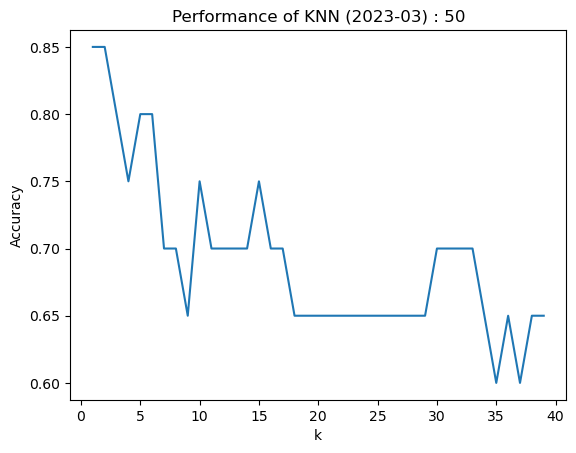

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

accuracies = []
ks = range(1, 40)
for k in ks:
    knn = KNeighborsClassifier(distance_matrix_function, k=k)
    knn.fit(x_train, y_train)
    accuracy = knn.evaluate(x_test, y_test)
    accuracies.append(accuracy)
    
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title=f"Performance of KNN ({date.strftime('%Y-%m')}) : {sample_size}")
plt.savefig(f"{folder_base}/{folder_name}/knn-single.png")
plt.show()

#### Average KNN (m = 200)

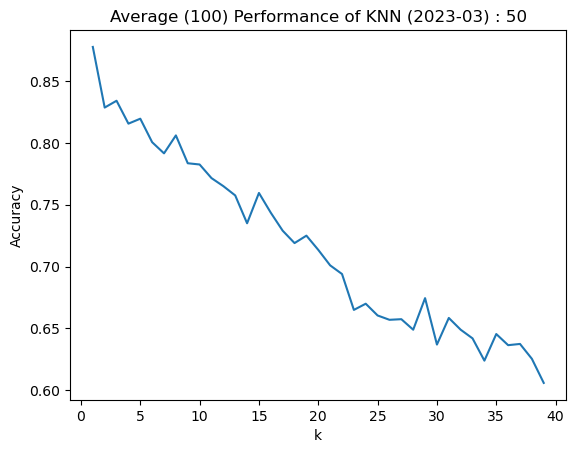

In [10]:
m = 100
accuracies = []

ks = range(1, 40)
for k in ks:
    k_accuracies = []
    for i in range(m):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
        knn = KNeighborsClassifier(distance_matrix_function, k=k)
        knn.fit(x_train, y_train)
        accuracy = knn.evaluate(x_test, y_test)
        k_accuracies.append(accuracy)
    average = sum(k_accuracies) / len(k_accuracies)
    accuracies.append(average)
    
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title=f"Average ({m}) Performance of KNN ({date.strftime('%Y-%m')}) : {sample_size}")
plt.savefig(f"{folder_base}/{folder_name}/knn-average.png")
plt.show()